# Reconocimiento de patrones y aprendizaje automático

## Tarea 2: Métricas de clasificación

#### Profesor: Andrés Aldana Gonzáles<br> Ayudante: Felipe Navarrete Córdova<br> Alumno: Ricardo Eduardo Rivas Roa

Fecha de entrega: Viernes 10 de diciembre de 2021

## 1. Ejercicios
### 1. Máquinas de Soporte Vectorial (3 pt).
a) Describa detalladamente qué son y cómo funcionan las Máquinas de Soporte Vectorial (SVM) <br>
$R.$ Son un tipo de método de aprendizaje supervisado que se usan para clasificación, regresión y detección de outliers. Este consiste en colocar un hiperplano de clasificación con márgenes suaves a través de un conjunto de datos que se necesitan separar en 2 clases. Esto no es tan complicado cuando sólo se requiere una línea recta o un plano para hacer la clasificación. Sin embargo, hay veces que se necesita una linea ondulada más complicada. Para resolver este problema la máquina de soporte vectorial manda los datos a un espacio dimensional mayor haciendo que sólo se necesite un hiperplano para hacer la clasificación de forma más sencilla. 


b) Describa el proceso de entrenamiento de una SVM <br>
$R.$ La SVM toma algunos elementos pivotales dentro de los márgnenes suaves los cuáles se conocen como vectores de soporte. Al tomar esto vectores de soporte la SVM intenta tomar la línea que maximiza los márgenes suaves, de esta forma la clasificación siempre será consistente sin importar la cantidad de datos que se tengan. Ahora, SVM cuenta con un parámetro "C" con el cuál se le indica qué tan suaves o duros se quieren los márgenes. Para saber cuál es el márgen óptimo se utiliza "Cross Validation" con diferentes valores de "C".


c) ¿Qué es el kernel de una SVM?<br>
$R.$ Es una expresión matemática que ayuda a calcular relaciones en dimensiones mayores. Los 2 kernels más usados son el Kernel polinomial y el kernel Gaussiano RBF (radial basis function). El kernel polinomial está dado por la expresión $k_p(x_1,x_2)=(x_1x_2+r)^d$ donde $x_1$ y $x_2$ son 2 observaciones en el conjunto de datos, $r$ es sólo un coeficiente y $d$ es el grado del polinomio. El kernel Gaussiano RBF está dado por la expresión $k_{rbf}(x_1, x_2) =  e^{(\gammaǁx_1 - x_2ǁ^2)}$ dónde $x_1$ y $x_2$ son 2 observaciones en el conjunto de datos y $\gamma$ es un parámetro que controla en ancho del kernel Gaussiano.


d) ¿Cuáles son las ventajas y desventajas de usar kernels polinomiales de alto y bajo grado?<br>
$R.$ Una de las principales ventajas de usar un kernel polinomial de alto grado es que es mucho más flexible lo cuál se traduce en una desventaja para el kernel de polinomio bajo, es decir es menos flexible. Ahora la desventaja de usar polinomios altos es que vienen con un costo de mayor complejidad de tiempo y espacio, lo cuál por defecto se vuelve una fortaleza de los polinomios de bajo grado.


e) Explique detalladamente qué es el kernel trick<br>
$R.$ Generalmente cuando se mandan los datos a una dimensión mayor lo que se hace es agregar una columna extra de datos por cada dimensión que se aumente, haciendo que el tiempo de calculo aumente haciendo la técnica menos eficiente. Por esto se usa el kernel trick, que consiste en calcular las relaciones de los datos en dimensiones mayores con los kernels que se mencionaron en la pregunta c). De modo que no hay necesidad de crear una nueva columna de datos. 

f) Explique detalladamente el kernel basado en funciones de base radial gaussianas (Gaussian RBF Kernel) <br>
$R.$ Como se explico en la pregunta c) el kernel Gaussiano RBF está dado por la expresión $k_{rbf}(x_1, x_2) =  e^{(\gammaǁx_1 - x_2ǁ^2)}$. Este kernel hace que los datos tengan una relación de distribución normal o gaussiana en una dimensión mayor y que sean linealmente separables. En este kernel $\gamma$ sirve como un parámetro de regularización ya que $\gamma$ controla el ancho de la curva gaussiana, de modo que una $\gamma$ muy pequeña genera una curva muy ancha, lo cual provoca underfitting y una $\gamma$ muy grande genera una curva muy angosta provocando overfitting. Por otro lado, una gaussiana está dada por una exponencial, que en términos de una expansión de Taylor corresponden a un polinomio infinito, de modo que usar el kernel RBF es el equivalente a separar los datos con un polinomio infinito.

### 2. MNIST y regresión logística (7 pts).
El conjunto de datos MNIST contiene 70,000 imágenes de dígitos escritos a mano. Cada imagen de 28x28 píxeles está representada por un vector de 784 píxeles. Cada píxel puede tomar uno entre 256 tonos de gris, donde 0 es negro absoluto y 255 es blanco absoluto. Todos los vectores tienen asociada una etiqueta que indica el dígito escrito en la imagen.
El objetivo de este ejercicio es construir un clasificador que permita identificar el dígito al que corresponde la información de cada imagen.


a) Descargue el archivo de datos mnist-original.mat desde Kaagle y agréguelo a su directorio raíz.

b) Cargue los datos y etiquetas en python. El archivo MNIST load.pynb contiene un ejemplo de cómo cargar los datos de MNIST.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, f1_score, accuracy_score
import math

In [2]:
#Función para cargar los datos
def load_mnist_dataset():
    """
    Carga el archivo de datos MNIST

    Regresa:
    - mnist_data. Lista de vectores, cada uno con 784 pixeles de una imagen de 28x28
    - mnist_label. Las etiquetas de cada imagen
    - classes_count. El número de clases
    - shape. La forma de cada registro
    """

    mnist = loadmat("mnist-original.mat")
    mnist_data = mnist["data"].T
    mnist_label = mnist["label"][0]
    count = len(set(mnist_label))
    return mnist_data, mnist_label, count, (28, 28, 1)

In [3]:
#Carga y print de shape de datos
data, labels, classes_count, data_shape = load_mnist_dataset()

print("data shape: " + str(data.shape))
print("labels shape: " + str(labels.shape))
print("classes count: " + str(classes_count))

data shape: (70000, 784)
labels shape: (70000,)
classes count: 10


In [4]:
#Función para graficar imágenes aleatorias de MNIST
def plot_images_sample(X, Y):
    # Draw plot for images sample
    X=X.reshape(len(X),28,28,1) #Cambiamos la forma de los datos para graficarlos.Usamos matrices de 28x28.
    plt.figure(figsize=(15,7))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
        plt.xlabel(Y[index])
    plt.show()

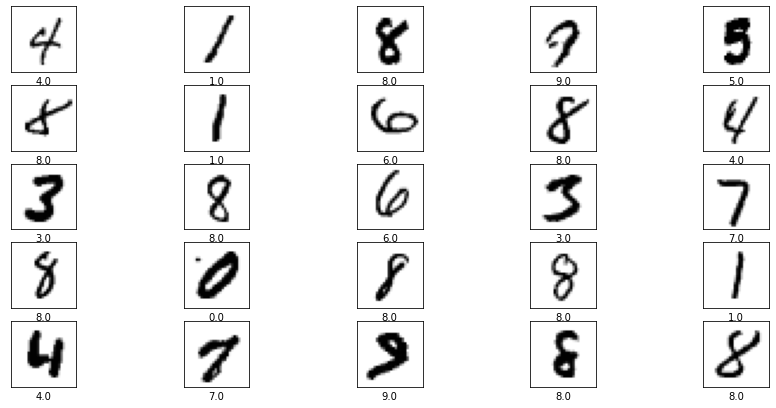

In [6]:
#se llama a la función de graficación aleatoria
plot_images_sample(data, labels)

c) Divida el conjunto de datos en Entrenamiento (50 %), Calibración (20 %) y Prueba (30 %).

Usaremos train_test_split 2 veces. Primero separando los datos en 70/30 y posteriormente separaremos al 70 en 71/29 para tener la proporción 50/20/30 

In [5]:
#primer split
X_train, X_prueba, y_train, y_prueba = train_test_split(data, labels, train_size=0.7)

In [6]:
#segundo split
X_entr, X_calib, y_entr, y_calib = train_test_split(X_train, y_train, train_size=5/7)

In [7]:
#Se comprueba que se tienen las proporciones esperadas
print(len(X_entr)/len(data),len(X_calib)/len(data),len(X_prueba)/len(data))

0.5 0.2 0.3


d) Utilizando regresión logística, construya un clasificador para MNIST, para ello debe considerar un clasificador binario capaz de reconocer cada dígito. Use el conjunto de entrenamiento para entrenar cada sub-clasificador.

Tenemos que hacer 10 clasificadores y para ello necesitamos 10 etiquetas binarias diferentes para cada clasificador

In [8]:
#Función para almacenar etiquetas binarias en un diccionario
y_data={'y_entr':y_entr, 'y_calib':y_calib, 'y_prueba':y_prueba}#diccionario de etiquetas verdaderas
def turn_data_to_onehot(dictionary,classes_count=10):
    labels_binary={}
    for i in range(classes_count):
        for j in dictionary:
            replace=dictionary.get(j)
            replace=np.where(dictionary.get(j) == i, 'True', replace)
            replace=np.where(replace != 'True', 0,replace)
            replace=np.where(replace == 'True', 1,replace)
            replace=replace.astype('float64')
            labels_binary[j+'_bin_'+str(i)]=replace
    return labels_binary
y_data_binary=turn_data_to_onehot(y_data)#se llama la función para hacer los datos onehot
y_data_binary #visualizamos el diccionario resultante

{'y_entr_bin_0': array([0., 0., 0., ..., 0., 0., 1.]),
 'y_calib_bin_0': array([0., 0., 0., ..., 0., 0., 0.]),
 'y_prueba_bin_0': array([0., 0., 0., ..., 0., 0., 0.]),
 'y_entr_bin_1': array([0., 0., 0., ..., 0., 0., 0.]),
 'y_calib_bin_1': array([1., 0., 0., ..., 0., 1., 0.]),
 'y_prueba_bin_1': array([0., 0., 0., ..., 0., 0., 0.]),
 'y_entr_bin_2': array([0., 0., 0., ..., 0., 0., 0.]),
 'y_calib_bin_2': array([0., 1., 0., ..., 0., 0., 0.]),
 'y_prueba_bin_2': array([0., 0., 0., ..., 0., 0., 1.]),
 'y_entr_bin_3': array([1., 0., 0., ..., 0., 0., 0.]),
 'y_calib_bin_3': array([0., 0., 0., ..., 0., 0., 0.]),
 'y_prueba_bin_3': array([0., 0., 1., ..., 0., 0., 0.]),
 'y_entr_bin_4': array([0., 1., 0., ..., 0., 0., 0.]),
 'y_calib_bin_4': array([0., 0., 0., ..., 1., 0., 0.]),
 'y_prueba_bin_4': array([1., 0., 0., ..., 0., 0., 0.]),
 'y_entr_bin_5': array([0., 0., 0., ..., 1., 0., 0.]),
 'y_calib_bin_5': array([0., 0., 0., ..., 0., 0., 0.]),
 'y_prueba_bin_5': array([0., 0., 0., ..., 1., 0.

Ya una vez tenemos las etiquetas binarias procedemos a hacer los 10 clasificadores.

In [25]:
#Se entrenan los 10 modelos y se guardan las predicciones en el diccionario 'predictions'
X_data={'X_entr':X_entr,'X_calib': X_calib, 'X_prueba':X_prueba}
names_of_data=['_entr','_calib','_prueba']
predictions={}
logit = linear_model.LogisticRegression(random_state=49,solver='liblinear', max_iter=5000)
for i in range(10):
    logit.fit(X_entr, y_data_binary.get('y_entr_bin_'+str(i)))
    for j in names_of_data:
        predictions['pred'+j+'_'+str(i)]=logit.predict(X_data.get('X'+j))

In [12]:
predictions

{'pred_entr_0': array([0., 0., 0., ..., 0., 0., 0.]),
 'pred_calib_0': array([0., 0., 0., ..., 0., 0., 0.]),
 'pred_prueba_0': array([1., 0., 0., ..., 0., 1., 0.]),
 'pred_entr_1': array([0., 0., 0., ..., 0., 1., 0.]),
 'pred_calib_1': array([0., 0., 0., ..., 0., 0., 0.]),
 'pred_prueba_1': array([0., 0., 0., ..., 0., 0., 0.]),
 'pred_entr_2': array([0., 0., 0., ..., 0., 0., 0.]),
 'pred_calib_2': array([0., 0., 0., ..., 0., 0., 0.]),
 'pred_prueba_2': array([0., 1., 0., ..., 0., 0., 0.]),
 'pred_entr_3': array([0., 1., 0., ..., 0., 0., 0.]),
 'pred_calib_3': array([0., 0., 0., ..., 0., 0., 0.]),
 'pred_prueba_3': array([0., 0., 0., ..., 0., 0., 0.]),
 'pred_entr_4': array([0., 0., 1., ..., 0., 0., 0.]),
 'pred_calib_4': array([0., 0., 1., ..., 0., 1., 0.]),
 'pred_prueba_4': array([0., 0., 1., ..., 0., 0., 0.]),
 'pred_entr_5': array([0., 0., 0., ..., 0., 0., 0.]),
 'pred_calib_5': array([0., 0., 0., ..., 0., 0., 0.]),
 'pred_prueba_5': array([0., 0., 0., ..., 0., 0., 0.]),
 'pred_ent

e) Dado un clasificador que reconoce al dígito $i$, la regresión logística indica la probabilidad de que los datos de entrada $x$ pertenezcan a la clase $i$, $P_i(x)$. Dado un umbral de probabilidad $θ_i$, se considera que $x$ pertenece a la clase $i$ si $P_i(x) ≥ θ_i$. Use el conjunto de calibración para evaluar el rendimiento de cada clasificador y determinar el umbral $θ_i$ que hace el mejor compromiso entre la taza de verdaderos positivos y la taza de falsos positivos. Para ello, en cada clasificador:
<br>1) Calcule una matriz de confusión usando los datos de calibración.

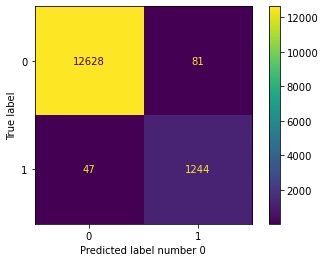

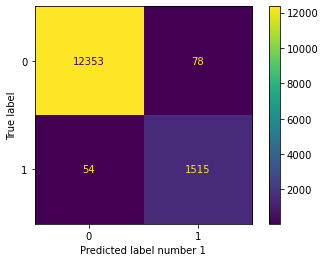

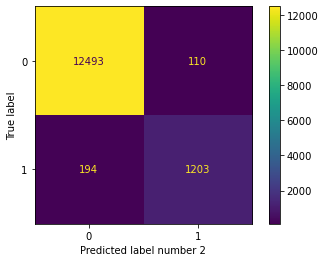

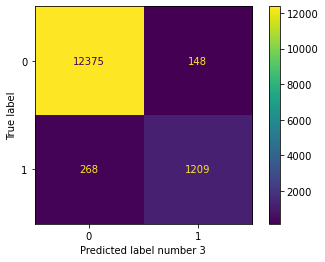

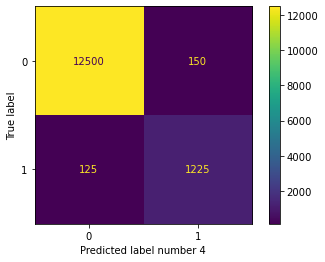

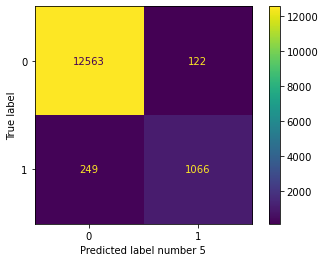

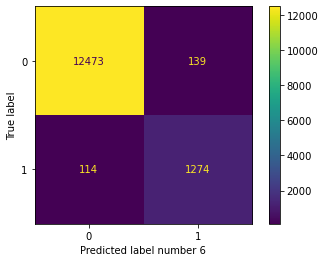

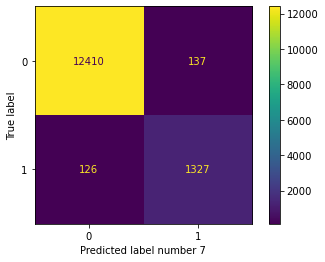

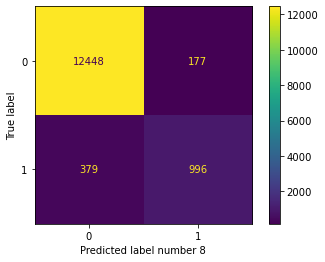

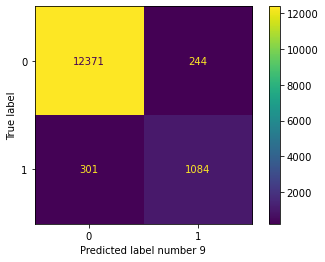

In [13]:
#Se calculan y se grafican las matrices de confusión
for i in range(10):  
    conf = confusion_matrix(y_data_binary.get('y_calib_bin_'+str(i)), predictions.get('pred_calib_'+str(i)))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=(0, 1))
    disp.plot()
    plt.xlabel('Predicted label number '+str(i))
plt.show()

2) A partir de la matriz de confusión, grafique en un solo panel las curvas de Precisión y Recall en función del umbral (al menos 100 valores).

Para esta parte tomaremos ayuda de la función precision_recall_curve de scikit. Almacenaremos sus valores en diccionarios y necesitaremos reentrenar los 10 modelos. Sé que no es la forma más eficiente pero por el tiempo no pude pensar en otra solución. Me aseguro que el modelo sea el mismo en todo el proyecto al poner random_state=49.

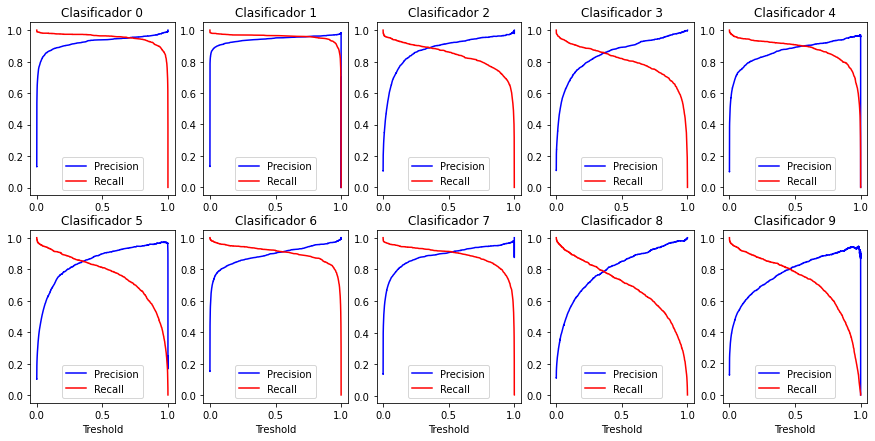

In [14]:
#función para calcular, almacenar valores en diccionarios y graficar funciones
precision={}
recall={}
thresholds={}
probas_ys={}
plt.figure(figsize=(15,7))
logit = linear_model.LogisticRegression(random_state=49,solver='liblinear', max_iter=5000)
for i in range(10):
    logit.fit(X_entr, y_data_binary.get('y_entr_bin_'+str(i)))
    probas_ys['pys_'+str(i)] = logit.predict_proba(X_calib)[:, 1]
    precision['pre_'+str(i)], recall['rec_'+str(i)], thresholds['tre_'+str(i)] = precision_recall_curve(y_data_binary.get('y_calib_bin_'+str(i)), probas_ys.get('pys_'+str(i)))
    plt.subplot(2,5,i+1)
    plt.plot(thresholds.get('tre_'+str(i)), precision.get('pre_'+str(i))[:-1], "b-", label="Precision")
    plt.plot(thresholds.get('tre_'+str(i)), recall.get('rec_'+str(i))[:-1], "r-", label="Recall")
    plt.title('Clasificador '+str(i))
    plt.legend()
    if i >4:
        plt.xlabel('Treshold')
plt.show()

In [15]:
#Se comprueba la longitud de los tresholds. No son menores a 8000
for i in range(10):
    print('thresholds',str(i),':', len(thresholds.get('tre_'+str(i))))

thresholds 0 : 9831
thresholds 1 : 11820
thresholds 2 : 13400
thresholds 3 : 13702
thresholds 4 : 13705
thresholds 5 : 13142
thresholds 6 : 9241
thresholds 7 : 10568
thresholds 8 : 12801
thresholds 9 : 10996


3) Grafique una curva ROC mostrando el compromiso entre TPR y FPR para cada valor del umbral (al menos 100 valores).

Se usan las funciones roc_auc_score y roc_curve y estas se entrenan con los valores guardados en diccionarios previos. Particularmente se vuelven a guardar los resultados de estas funciones en otros diccionarios y se grafican los resultados.

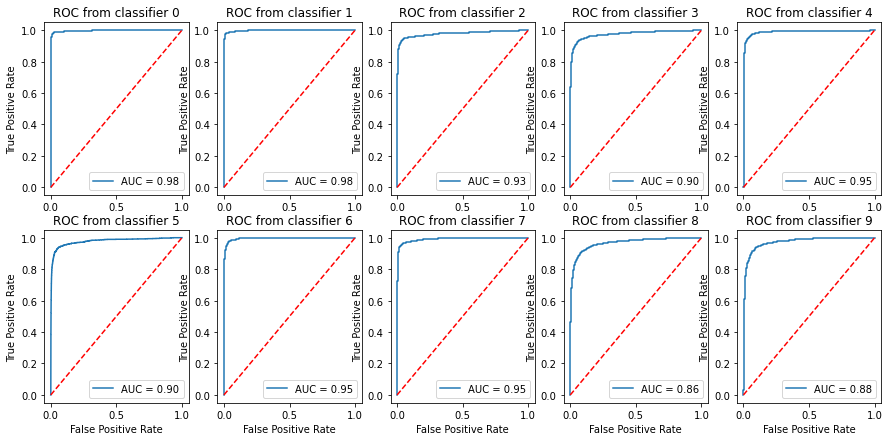

In [16]:
fpr={}
tpr={}
roc_thresholds={}
auc={}
plt.figure(figsize=(15,7))
for i in range(10):
    auc['auc_'+str(i)] = roc_auc_score(y_data_binary.get('y_calib_bin_'+str(i)), predictions.get('pred_calib_'+str(i)))
    fpr['fpr_'+str(i)], tpr['tpr_'+str(i)], roc_thresholds['trs_'+str(i)] = roc_curve(y_data_binary.get('y_calib_bin_'+str(i)), probas_ys.get('pys_'+str(i)))
    plt.subplot(2,5,i+1)
    plt.plot(fpr.get('fpr_'+str(i)), tpr.get('tpr_'+str(i)), label='AUC = %0.2f' % auc.get('auc_'+str(i)))
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC from classifier '+str(i))
    plt.legend()
    plt.ylabel('True Positive Rate')
    if i >4:
        plt.xlabel('False Positive Rate')
plt.show()

4) Obtenga el valor del umbral que simultáneamente maximice la TPR y minimice la FPR.

In [17]:
#Comprobamos que fpr, tpr y thresholds de roc tengan las mismas longitudes
for i in range(10):
    print(' tpr ',str(i) ,' lenght:',len(tpr.get('tpr_'+str(i))),' fpr ', str(i),' lenght:',len(fpr.get('fpr_'+str(i)))
    ,' ths ',str(i), ' lenght:',len(roc_thresholds.get('trs_'+str(i))))

 tpr  0  lenght: 206  fpr  0  lenght: 206  ths  0  lenght: 206
 tpr  1  lenght: 229  fpr  1  lenght: 229  ths  1  lenght: 229
 tpr  2  lenght: 486  fpr  2  lenght: 486  ths  2  lenght: 486
 tpr  3  lenght: 662  fpr  3  lenght: 662  ths  3  lenght: 662
 tpr  4  lenght: 435  fpr  4  lenght: 435  ths  4  lenght: 435
 tpr  5  lenght: 603  fpr  5  lenght: 603  ths  5  lenght: 603
 tpr  6  lenght: 380  fpr  6  lenght: 380  ths  6  lenght: 380
 tpr  7  lenght: 433  fpr  7  lenght: 433  ths  7  lenght: 433
 tpr  8  lenght: 852  fpr  8  lenght: 852  ths  8  lenght: 852
 tpr  9  lenght: 836  fpr  9  lenght: 836  ths  9  lenght: 836


Sabemos que en la curva ROC el punto que más minimiza FPR y maximiza TPR es el punto (0,1). Entonces para encontrar el treshold óptimo calularemos el valor con la menor distancia euclidiana a este punto dado por FPR y TPR y guardaremos el treshold asociado a este valor óptimo.

In [18]:
#treshold optimo dada una distancia euclidiana
optimal_threshold={}
roc_values={}#valores del punto optimo para graficar en las curvas roc
for i in range(10):
    distance=1#la peor distancia posible
    best_trs=[]
    for j in range(len(fpr.get('fpr_'+str(i)))):
        euclidian=math.sqrt(((-fpr.get('fpr_'+str(i))[j])**2)+((1-tpr.get('tpr_'+str(i))[j])**2)) #distancia euclidiana
        if euclidian<distance:
            best_trs=[]
            best_trs.append(roc_thresholds.get('trs_'+str(i))[j])
            roc_values['fpr_tpr_'+str(i)]=np.array([fpr.get('fpr_'+str(i))[j],tpr.get('tpr_'+str(i))[j]])
            distance=euclidian
        elif distance==euclidian:
            best_trs.append(roc_thresholds.get('trs_'+str(i))[j])
    optimal_threshold['trs_'+str(i)]=best_trs

In [19]:
#Mostramos los thresholds optimos para cada clasificador
optimal_threshold

{'trs_0': [0.08876580511233323],
 'trs_1': [0.045983300922957375],
 'trs_2': [0.09834933549766373],
 'trs_3': [0.07538825279248175],
 'trs_4': [0.05539979234863587],
 'trs_5': [0.08272999334898834],
 'trs_6': [0.052888384116405986],
 'trs_7': [0.090684770835813],
 'trs_8': [0.10160212088739734],
 'trs_9': [0.12388458990220691]}

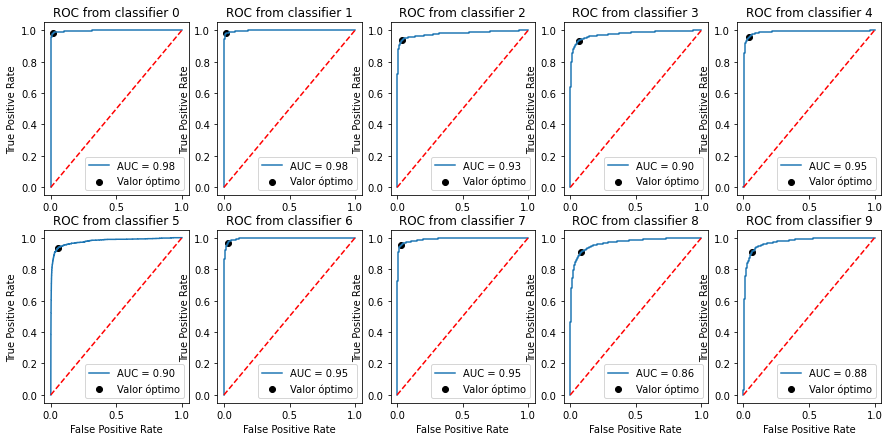

In [20]:
#Se grafica el punto óptimo en las curvas roc
plt.figure(figsize=(15,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.plot(fpr.get('fpr_'+str(i)), tpr.get('tpr_'+str(i)), label='AUC = %0.2f' % auc.get('auc_'+str(i)))
    plt.scatter(roc_values.get('fpr_tpr_'+str(i))[0],roc_values.get('fpr_tpr_'+str(i))[1], marker='o', color='black', label='Valor óptimo')
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC from classifier '+str(i))
    plt.legend()
    plt.ylabel('True Positive Rate')
    if i >4:
        plt.xlabel('False Positive Rate')
plt.show()

f) Evalúe el rendimiento del clasificador MNIST completo usando los datos de prueba:
<br>1) Obtenga la matriz de confusión final para el clasificador MNIST considerando las 10 clases.

Necesariamente aquí nos enfrentamos al problema de convertir una matriz de 10 clasificadores con 2 labels a 1 vector con 10 labels para poder evaluar una matriz de confusion. Para esto calcularemos las probabilidades con predict_proba y el label con la proba de mayor valor indicado será el que se quedará en el vector.

In [21]:
#función para obtener las probas. Esta función es demasiado lenta ya que hace 10 entrenamientos pero llega a los resultados
stuff={}#aqui se guardan las probas de cada clasificador
logit = linear_model.LogisticRegression(random_state=49,solver='liblinear', max_iter=5000)
for i in range(10):
    logit.fit(X_entr, y_data_binary.get('y_entr_bin_'+str(i)))#otra vez reentrenamos el modelo 10 veces
    stuff['pys_'+str(i)] = logit.predict_proba(X_prueba)[:, 1]

In [22]:
#función para hacer el vector de 10 labels
vector=[]
for j in range(len(stuff.get('pys_9'))):
    probabilidad=0
    label=0
    for i in range(10):
        if probabilidad < stuff.get('pys_'+str(i))[j]:
            label=i
            probabilidad=stuff.get('pys_'+str(i))[j]
    vector.append(label)
vector=np.asarray(vector)

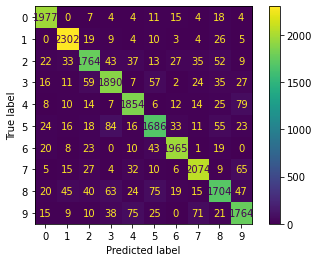

In [23]:
#Matriz de Confusión Final
cm_final = confusion_matrix(y_prueba, vector)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_final, display_labels=( 0,1,2,3,4,5,6,7,8,9))
disp.plot()
plt.show()

2) Calcule las métricas Micro-F1, Macro-F1, Weighted F1 y Average Accuracy de sistema.

In [24]:
print('Micro-F1: ',f1_score(y_prueba, vector, average='micro'))
print('Macro-F1: ', f1_score(y_prueba, vector, average='macro'))
print('Weighted_F1: ', f1_score(y_prueba, vector, average='weighted'))
print('Average Accuaracy: ', accuracy_score(y_prueba, vector))

Micro-F1:  0.9038095238095238
Macro-F1:  0.9023115411228574
Weighted_F1:  0.9034856029387036
Average Accuaracy:  0.9038095238095238


## Referencias
* Aurelien Geron - Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow-O’reilly (2019). Chapter 3 - Classification
* Müller, A., & Guido, S. (2016). Introduction to machine learning with Python (1st ed.). Sebastopol, CA: O'Reilly.
* VanderPlas, J. (2016). Python Data Science Handbook (1st ed.). Sebastopol, California: O'Reilly. Retrieved 11 November 2021 from https://jakevdp.github.io/PythonDataScienceHandbook/
* StatQuest. (2019). Support Vector Machines Part 2: The Polynomial Kernel (Part 2 of 3) [Video]. Retrieved from https://www.youtube.com/watch?v=Toet3EiSFcM&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=60
* Ben-Hur A., Weston J. (2010) A User’s Guide to Support Vector Machines. In: Carugo O., Eisenhaber F. (eds) Data Mining Techniques for the Life Sciences. Methods in Molecular Biology (Methods and Protocols), vol 609. Humana Press. https://doi.org/10.1007/978-1-60327-241-4_13
* Savas, C., & Dovis, F. (2019). The Impact of Different Kernel Functions on the Performance of Scintillation Detection Based on Support Vector Machines. Sensors, 19(23), 5219. doi:10.3390/s19235219
* StatQuest. (2019). Support Vector Machines Part 3: The Radial (RBF) Kernel (Part 3 of 3) [Video]. Retrieved from https://www.youtube.com/watch?v=Qc5IyLW_hns&t=572s